# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [25]:
#pip install scikit-learn --upgrade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics



Step 1:

In [12]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

Step 2:

In [13]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Son todas las variables son numericas

In [14]:
df_raw.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
133,8,84,74,31,0,38.3,0.457,39,0
426,0,94,0,0,0,0.0,0.256,25,0
535,4,132,0,0,0,32.9,0.302,23,1
398,3,82,70,0,0,21.1,0.389,25,0
629,4,94,65,22,0,24.7,0.148,21,0
285,7,136,74,26,135,26.0,0.647,51,0
264,4,123,62,0,0,32.0,0.226,35,1
250,9,106,52,0,0,31.2,0.380,42,0
676,9,156,86,0,0,24.8,0.230,53,1
363,4,146,78,0,0,38.5,0.520,67,1


In [10]:
df_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Los datos no estan muy correctos la persion no puede ser cero, el indice de glucosa no puede ser cero.
Tomar decisiones para procesar los datos

Ver cuantos datos en Cero hay y en funcion de eso ver si se analiza o no 


In [15]:
df_raw[df_raw['Pregnancies']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
16,0,118,84,47,230,45.8,0.551,31,1
45,0,180,66,39,0,42.0,1.893,25,1
57,0,100,88,60,110,46.8,0.962,31,0
58,0,146,82,0,0,40.5,1.781,44,0
...,...,...,...,...,...,...,...,...,...
713,0,134,58,20,291,26.4,0.352,21,0
727,0,141,84,26,0,32.4,0.433,22,0
736,0,126,86,27,120,27.4,0.515,21,0
753,0,181,88,44,510,43.3,0.222,26,1


In [16]:
len(df_raw[df_raw['Pregnancies']==0])

111

In [18]:
len(df_raw[df_raw['Insulin']==0])

374

In [19]:
len(df_raw[df_raw['BMI']==0])

11

Elimino 11 porque es menor a 0.1 y sustituyo los 0 en Insulino de diabeticos y no diabeticos
Lo mismo en el embarazo.

In [33]:
#limpieza de datos Caluclo el promedio para los que son cero 
df_0=df_raw[(df_raw['Outcome']==0) & (df_raw["Insulin"] > 0)]
insuline_mean_0=df_0['Insulin'].mean()

In [34]:
#limpieza de datos Calculo el promedio para los que no son cero
df_no0=df_raw[(df_raw['Outcome']!=0) & (df_raw["Insulin"] > 0)]
insuline_mean_no0=df_no0['Insulin'].mean()

In [35]:
def insulina(insulin_value, outcome_value, insuline_mean_0,insuline_mean_no0):
    if outcome_value==0 and insulin_value==0:
        return insuline_mean_0
    elif outcome_value==1 and insulin_value==0:
        return insuline_mean_no0
    else:
        return insulin_value

In [36]:
df_raw['Insulin'] = df_raw.apply(lambda x: insulina(x['Insulin'], x['Outcome'],insuline_mean_0,insuline_mean_no0), axis=1)

/tmp/ipykernel_2055/146697863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['Insulin'] = df_raw.apply(lambda x: insulina(x['Insulin'], x['Outcome'],insuline_mean_0,insuline_mean_no0), axis=1)


In [38]:
def set_value (data_value, outcome_value,mean_nodiab,mean_diab):
    if (outcome_value == 0 and data_value==0):
        return mean_nodiab
    elif (outcome_value ==1 and data_value ==0 ):
        return mean_diab
    else:
        return data_value

def set_use_mean (name_col):
#calc the mean for diabetic and not diabetic that the data is not 0
meanNoDiab = df_raw[(df_raw[name_col]>0) & (df_raw['Outcome']==0)][name_col].mean()
meanDiab = df_raw[(df_raw[name_col]>0) & (df_raw['Outcome']==1)][name_col].mean()

df_raw[name_col] = df_raw.apply(lambda x: set_value(x[name_col], x['Outcome'],meanNoDiab,meanDiab), axis=1)

set_use_mean('Insulin')
df_raw.describe()

IndentationError: expected an indented block (1579207923.py, line 11)

#Analisis de correlacion 


In [21]:
correlacion=df_raw.corr()
correlacion

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


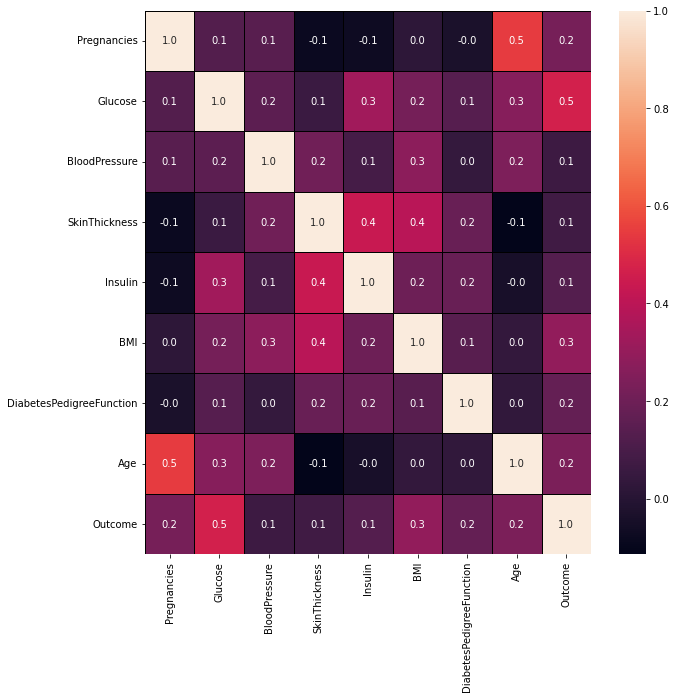

In [26]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df_raw.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

### Filtrado del DataSet

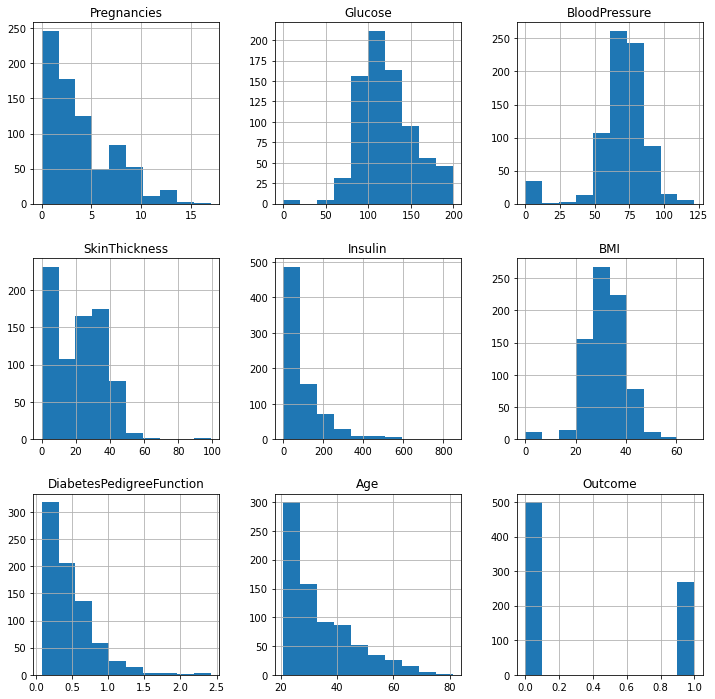

In [ ]:
df_raw.hist(figsize=(12,12))
plt.show()

In [27]:
 
#Filtrado de data set
df_raw = df_raw[(df_raw["BMI"] > 0 ) & (df_raw["BloodPressure"] > 0) & (df_raw["Glucose"] > 0)]
df_filter = df_raw.copy()
df_filter

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Step 3:

Diabetes test using decision tree

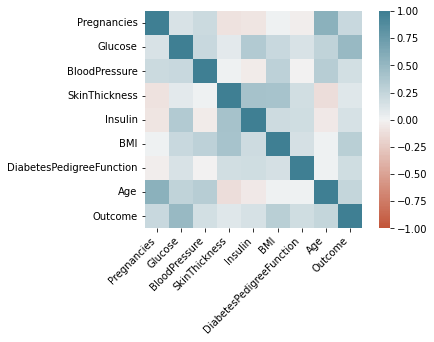

In [ ]:
import seaborn as sns
corr = df_raw.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [13]:
# feature selection
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = df_raw[feature_cols]
y = df_raw.Outcome

In [29]:
# split data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

Build the classifier

In [15]:
# build model
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, Y_train)

In [16]:
# predict
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0
 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]


Build the tree

In [17]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)
print(confusion_matrix(Y_test, y_pred))

# accuracy
print("Accuracy:", metrics.accuracy_score(Y_test,y_pred))

[[115  31]
 [ 39  46]]
Accuracy: 0.696969696969697


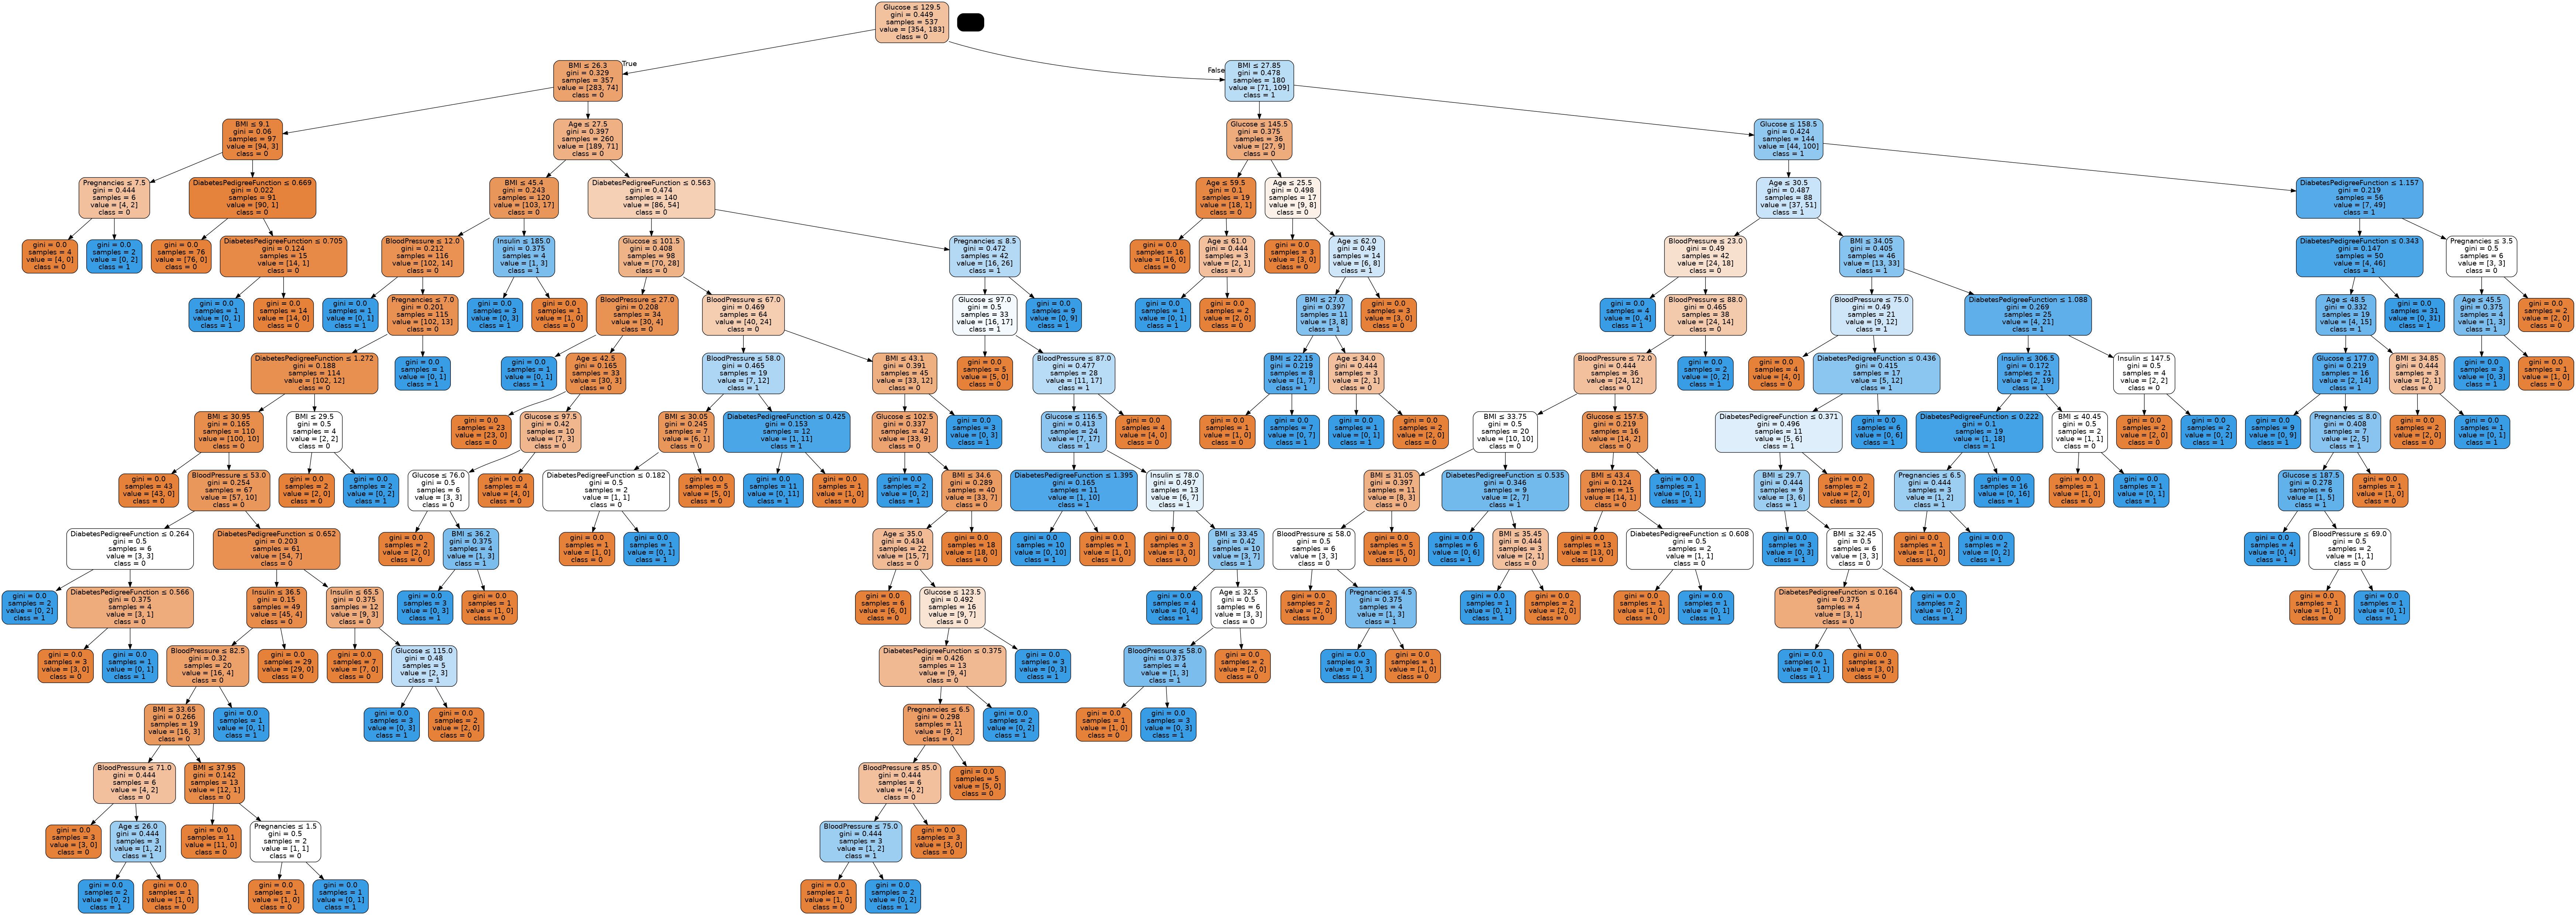

In [24]:
##sudo apt install graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
import os

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Step 4: Change your decision tree to use 'entropy' as criterion.

Step 5:Hypertune your model using GridSearch to find the best hyperparameters.

Train your model with the optimal hyperparameters.

Again use the app.py to create your final machine learning model.

Save your final model in the 'models' folder.

In your README file write a brief summary of your cleaning and modeling process.

### Referencia https://www.kaggle.com/code/aungpyaeap/diabetes-test-using-decision-tree/notebook